# Global distribution of total ice water path 

In [1]:
import datetime
from pathlib import Path

import cartopy.crs as ccrs
import cmocean
import matplotlib as mpl
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr
from matplotlib.gridspec import GridSpec

mpl.style.use("../ccic.mplstyle")

In [2]:
# read in all datasets
data_path = Path("/scratch/ccic_record/data/")


# CloudSat
data_path = Path("/scratch/ccic_record/data/")
cloudsat_global = xr.load_dataset(data_path / "processed/cloudsat_ccic_tiwp_ca.nc")
dardar_global = cloudsat_global.tiwp_dardar
dardar_global = cloudsat_global.tiwp_dardar.where(cloudsat_global.tiwp_dardar < 1e3)
cloudsat_global = cloudsat_global.tiwp_2cice

# ERA5
era5_global = xr.open_dataarray(data_path / "ERA5" / "era5_tiwp_global_distribution.nc")

# MODIS
modis = xr.open_dataset(data_path / "modis" / "global_distribution_cf_tiwp_modis.nc")
modis_global = modis.TIWP_global_distribution_unmasked / 1000

# ISCCP
isccp = xr.open_dataset(data_path / "processed" / "isccp_tiwp_ca.nc")
isccp_global = isccp.tiwp

# CCIC GridSat
ccic = xr.open_dataset(data_path / "processed" / "ccic_gridsat.nc")
# get CCIC coordinates
ds = xr.open_dataset(
    "/scratch/ccic_record/data/ccic/gridsat/ccic_gridsat_199911_monthlymean.nc"
)
# assign coordinates --
coords = {"latitude": ds.latitude.values, "longitude": ds.longitude.values}
ccic = ccic.assign_coords(coords)
ccic_global = ccic.tiwp

# CCIC CPCIR
ccic_cpcir = xr.open_dataset(data_path / "processed" / "ccic_cpcir_global_mean.nc")
ccic_cpcir_global = ccic_cpcir.tiwp

# PATMOS
patmosx = xr.open_dataset(
    data_path / "processed" / "PATMOS-x_timeseries198108-202106_notebook_results.nc"
)
patmosx_global = patmosx.tiwp_fullaverage / 1000


# 2C-ICE


# DARDAR

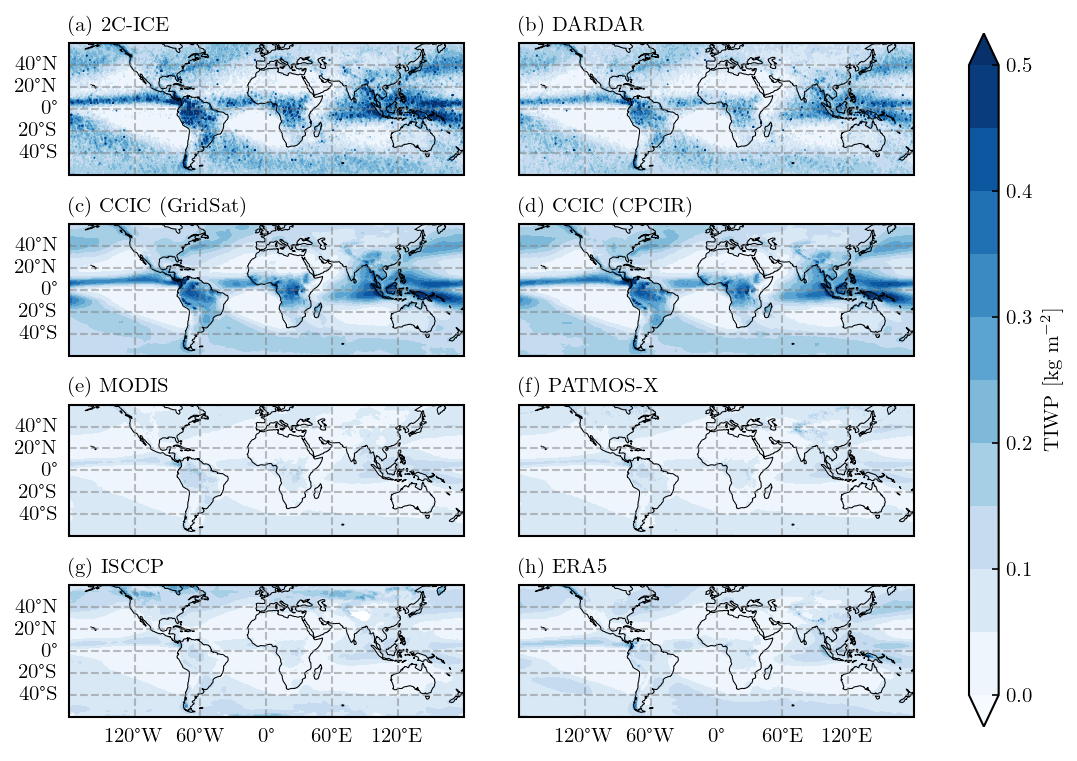

In [6]:
# Define the figure and each axis for the 3 rows and 2 columns
from matplotlib.gridspec import GridSpec
nrows = 4
ncols = 2
fs = None

datasets = [
    cloudsat_global,
    dardar_global,
    ccic_global,
    ccic_cpcir_global,
    modis_global,
    patmosx_global,
    isccp_global,
    era5_global,
]
names = [
    "2C-ICE",
    "DARDAR",
    "CCIC (GridSat)",
    "CCIC (CPCIR)",
    "MODIS",
    "PATMOS-X",
    "ISCCP",
    "ERA5",
]

fig = plt.figure(figsize=(8, 6))
gs = GridSpec(4, 3, width_ratios=[1.0, 1.0, 0.075])

crs = ccrs.PlateCarree()
axs = [fig.add_subplot(gs[ind // 2, ind % 2], projection=crs) for ind in range(8)]
# Loop over all of the models
for i, dataset in enumerate(datasets):

    # get coordinates
    if names[i] == "MODIS":
        lons = dataset.lon.data
        lats = np.flip(dataset.lat.data, axis=0)
    else:
        lons = dataset.longitude
        lats = dataset.latitude

    # Set extent
    axs[i].set_extent([-180, 180, -60, 60])
    # Contour plot
    cs = axs[i].contourf(
        lons,
        lats,
        dataset,
        levels=np.linspace(0, 0.5, 11),
        cmap=plt.cm.Blues,
        extend="both",
    )

    # Title each subplot with the name of the model
    axs[i].set_title(f"({chr(ord('a') + i)}) {names[i]}", fontsize=fs)

    # Draw the coastines for each subplot
    axs[i].coastlines(resolution="110m")

    gl = axs[i].gridlines(
        crs=ccrs.PlateCarree(),
        draw_labels=True,
        linewidth=1,
        color="gray",
        alpha=0.5,
        linestyle="--",
    )
    gl.top_labels = False
    gl.right_labels = False
    if i % 2 > 0:
        gl.left_labels = False
    if i // 2 < 3:
        gl.bottom_labels = False
    # plt.colorbar(cs, label = 'TIWP [kg m2$^{-1}$]')

cbar_ax = fig.add_subplot(gs[:, -1])
fig.colorbar(cs, cax=cbar_ax).set_label(label="TIWP [kg m$^{-2}$]")


# plt.tight_layout()
plt.savefig(data_path / "tiwp_spatial_maps_all.png", bbox_inches="tight", dpi=200)
plt.show()

In [21]:
plt.savefig(data_path / "tiwp_spatial_maps_all.png", bbox_inches="tight")

<Figure size 960x720 with 0 Axes>

PermissionError: [Errno 13] Permission denied: '/scratch/ccic_record/data/plots/tiwp_global_distribution.png'

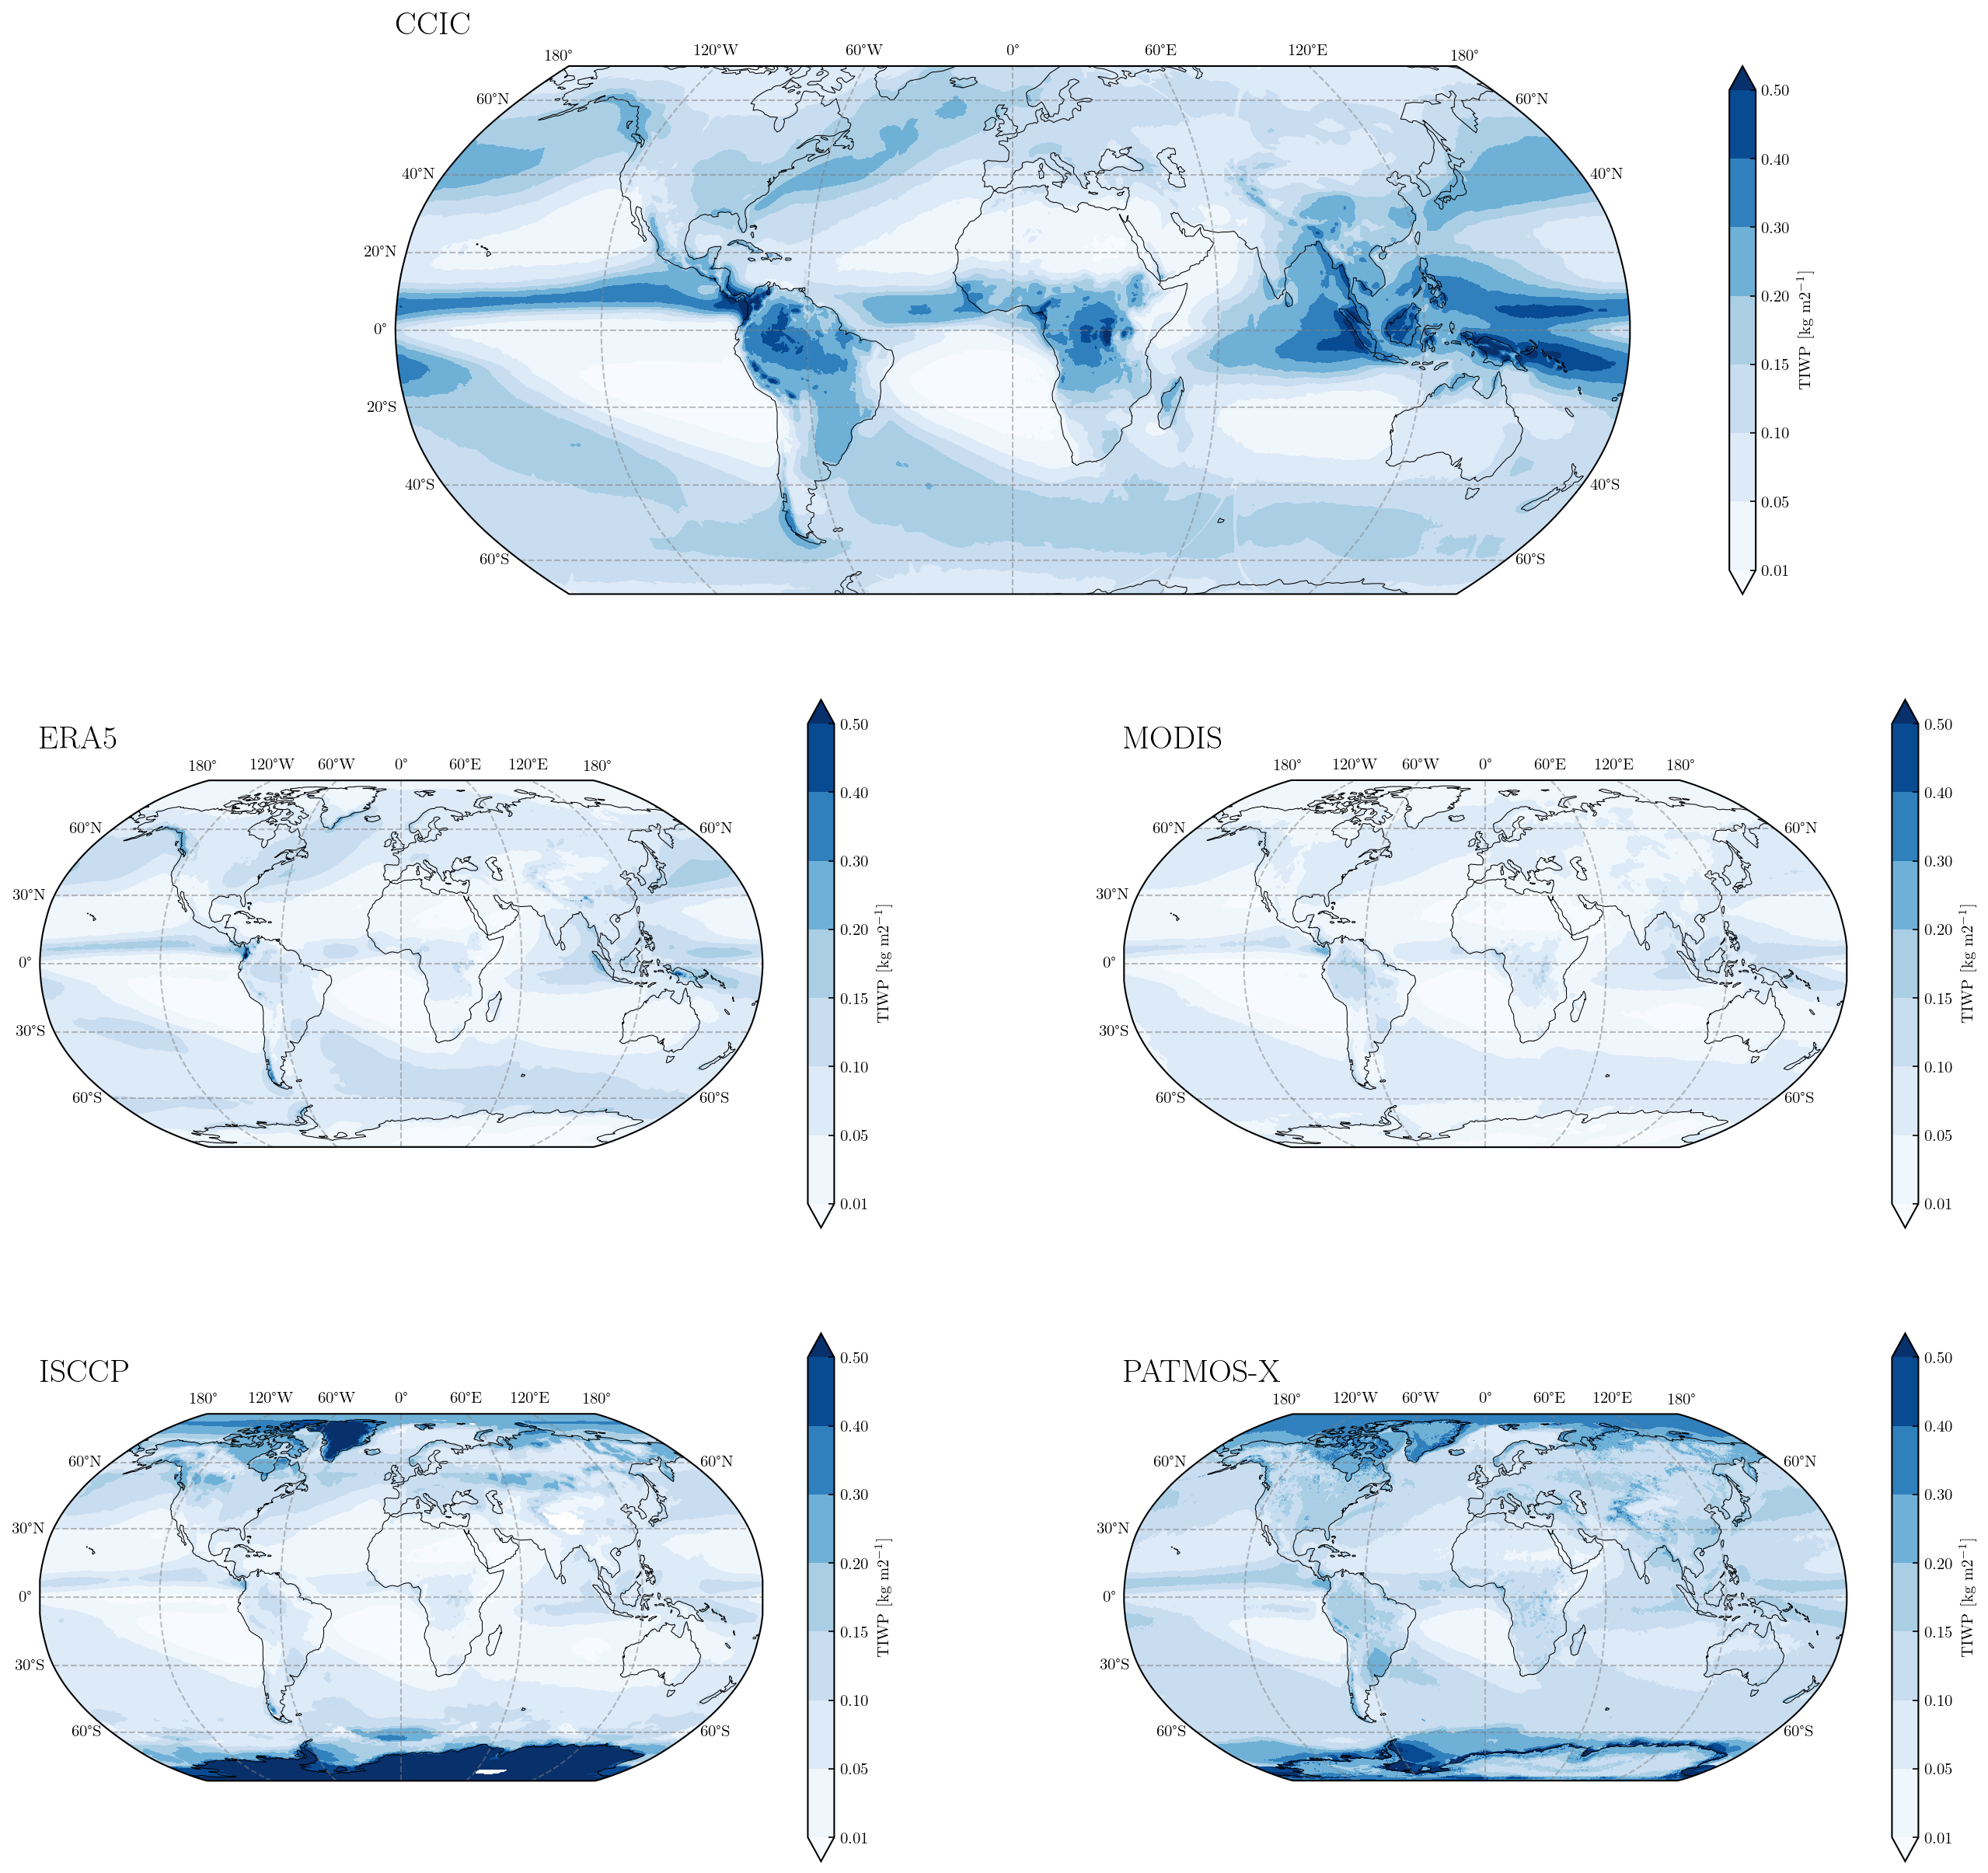

In [27]:
# Define the figure and each axis for the 3 rows and 2 columns
nrows = 3
ncols = 2
fs = 20
datasets = [ccic_global, era5_global, modis_global, isccp_global, patmosx_global]
names = ["CCIC", "ERA5", "MODIS", "ISCCP", "PATMOS-X"]

# fig, axs = plt.subplots(nrows=nrows,ncols=ncols,subplot_kw={'projection': ccrs.Robinson()},)
fig = plt.figure(figsize=(22, 20))

# gs = GridSpec(nrows, ncols, figure=fig)

ax1 = plt.subplot2grid(
    shape=(nrows, ncols), loc=(0, 0), colspan=2, projection=ccrs.Robinson()
)
ax2 = plt.subplot2grid(
    shape=(nrows, ncols), loc=(1, 0), colspan=1, projection=ccrs.Robinson()
)
ax3 = plt.subplot2grid(
    shape=(nrows, ncols), loc=(1, 1), colspan=1, projection=ccrs.Robinson()
)
ax4 = plt.subplot2grid(
    shape=(nrows, ncols), loc=(2, 0), colspan=1, projection=ccrs.Robinson()
)
ax5 = plt.subplot2grid(
    shape=(nrows, ncols), loc=(2, 1), colspan=1, projection=ccrs.Robinson()
)
axs = [ax1, ax2, ax3, ax4, ax5]

# axs is a 2 dimensional array of `GeoAxes`.  We will flatten it into a 1-D array
# axs=axs.flatten()

# Loop over all of the models
for i, dataset in enumerate(datasets):
    if names[i] == "MODIS":
        lons = dataset.lon.data
        lats = np.flip(dataset.lat.data, axis=0)
    else:
        # get coordinates
        lons = dataset.longitude
        lats = dataset.latitude
    # Contour plot
    cs = axs[i].contourf(
        lons,
        lats,
        dataset,
        transform=ccrs.PlateCarree(),
        levels=[0.01, 0.05, 0.1, 0.15, 0.2, 0.3, 0.4, 0.5],
        cmap=plt.cm.Blues,
        extend="both",
    )

    # Title each subplot with the name of the model
    axs[i].set_title(names[i], fontsize=fs)

    # Draw the coastines for each subplot
    axs[i].coastlines(resolution="110m")

    gl = axs[i].gridlines(
        crs=ccrs.PlateCarree(),
        draw_labels=True,
        linewidth=1,
        color="gray",
        alpha=0.5,
        linestyle="--",
    )
    gl.bottom_labels = False
    gl.right_labels = False
    plt.colorbar(cs, label="TIWP [kg m2$^{-1}$]")


plt.savefig(data_path / "plots" / "tiwp_global_distribution.png", bbox_inches="tight")
plt.show()